In [1]:
#!pip install scikit-learn

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

In [3]:
# Replace 'data_file.data' or 'data_file.csv' with the actual path to your dataset file
file_path_wine = 'drive/MyDrive/winequality-white.csv'
file_path_cancer = 'drive/MyDrive/wdbc.data'

# Assuming the data has a header row, adjust the header argument accordingly
# If there is no header, set header=None
# You may also need to specify the delimiter (e.g., delimiter=',') if it's not a comma-separated file
df_wine = pd.read_csv(file_path_wine, header=0, delimiter=';')
df_cancer = pd.read_csv(file_path_cancer, header=None)

# Assuming the last column is the original age labels
original_labels_wine = df_wine.iloc[:, -1]
original_labels_cancer = df_cancer.iloc[:, 1]

# For Wine Quality Dataset, determine Quality Bins ranges
quality_ranges = quality_bins = [0, 5, 10]

# Map original labels to age groups
quality_groups = pd.cut(original_labels_wine, bins=quality_ranges, labels=['Bad', 'Good'], include_lowest=True)

# Add the new quality group column to the DataFrame
df_wine['Quality Group'] = quality_groups

# Drop the original age column
df_wine = df_wine.drop(columns=df_wine.columns[-2])
#For Breast Cancer Dataset drop the ID column.
df_cancer = df_cancer.drop(columns=df_cancer.columns[0])

# Separate features (X) and labels (y)
X_wine = df_wine.iloc[:, 1:-1]  # Features (all columns except the last one)
y_wine = df_wine.iloc[:, -1]   # Labels (Quality Group)

X_cancer = df_cancer.iloc[:, 1:]  # Features (all columns except the first one)
y_cancer = df_cancer.iloc[:, 0]   # Labels (M, B group)

#Print an overview of the dataset
print(df_wine.head())
print(df_cancer.head())

#Print an overview of the X (training sample) and y (testing sample)
print(X_wine)
print(y_wine)
print(X_cancer)
print(y_cancer)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol Quality Group  
0      8.8          Good  
1      9.5          Good  
2    

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def decision_tree(X,y,depth, splitter,scorer):
  start_time = time.time()
  # Assuming X is your feature matrix and y is your target variable
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  clf_dt = DecisionTreeClassifier(criterion='entropy',max_depth=depth, splitter=splitter)  # You can adjust parameters as needed
  # Generate learning curves
  train_sizes, train_scores, test_scores = learning_curve(clf_dt, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),scoring=scorer)

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  # Plot the learning curve
  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(train_sizes, test_mean, label='Testing Score', marker='o')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

  plt.title(f'Decision Tree Learning Curve: Max Depth {depth}, Splitter {splitter}')
  plt.xlabel('Training Examples')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()


  # Creating a Decision Tree classifier
  clf = DecisionTreeClassifier(criterion='entropy',splitter='best')  # You can adjust parameters as needed

  param_range = np.arange(1, 21)
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Creating a Decision Tree classifier
  clf = DecisionTreeClassifier(criterion='entropy', splitter='random')  # You can adjust parameters as needed

  param_range = np.arange(1, 21)
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean2 = np.mean(train_scores, axis=1)
  train_std2 = np.std(train_scores, axis=1)
  test_mean2 = np.mean(test_scores, axis=1)
  test_std2 = np.std(test_scores, axis=1)

  plt.figure(figsize=(10, 6))
  plt.plot(param_range, train_mean, label='Training Score (Best)', marker='o')
  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(param_range, test_mean, label='Testing Score (Best)', marker='o')
  plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15)
  plt.plot(param_range, train_mean2, label='Training Score (Random)', marker='o')
  plt.fill_between(param_range, train_mean2 - train_std2, train_mean2 + train_std2, alpha=0.15)
  plt.plot(param_range, test_mean2, label='Testing Score (Random)', marker='o')
  plt.fill_between(param_range, test_mean2 - test_std2, test_mean2 + test_std2, alpha=0.15)
  plt.title('Decision Tree Validation Curve')
  plt.xlabel('max_depth')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Define the range of max_depth values to explore
  param_grid = {'max_depth': np.arange(1, 21), 'splitter': ['best','random']}

  # Create a Decision Tree classifier
  clf = DecisionTreeClassifier()

  # Perform grid search with cross-validation
  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  # Get the best max_depth value
  print(grid_search.best_params_)
  best_max_depth = grid_search.best_params_['max_depth']
  best_splitter = grid_search.best_params_['splitter']

  # Train a decision tree classifier with the best max_depth
  best_clf = DecisionTreeClassifier(max_depth=best_max_depth)
  best_clf.fit(X_train, y_train)

  # Make predictions on the validation set
  y_val_pred = best_clf.predict(X)

  # Calculate accuracy on the validation set
  accuracy_val = accuracy_score(y, y_val_pred)

  print(f"Best max_depth: {best_max_depth}")
  print(f"Best accuracy with best hyperparameters: {accuracy_val}")

  # Training the model
  clf_dt.fit(X_train, y_train)

  # Making predictions
  y_pred_dt = clf_dt.predict(X_test)

  # Evaluating accuracy
  accuracy_dt = accuracy_score(y_test, y_pred_dt)
  print(f'Decision Tree Accuracy: {accuracy_dt}')

  total_time = time.time() - start_time
  print(total_time)

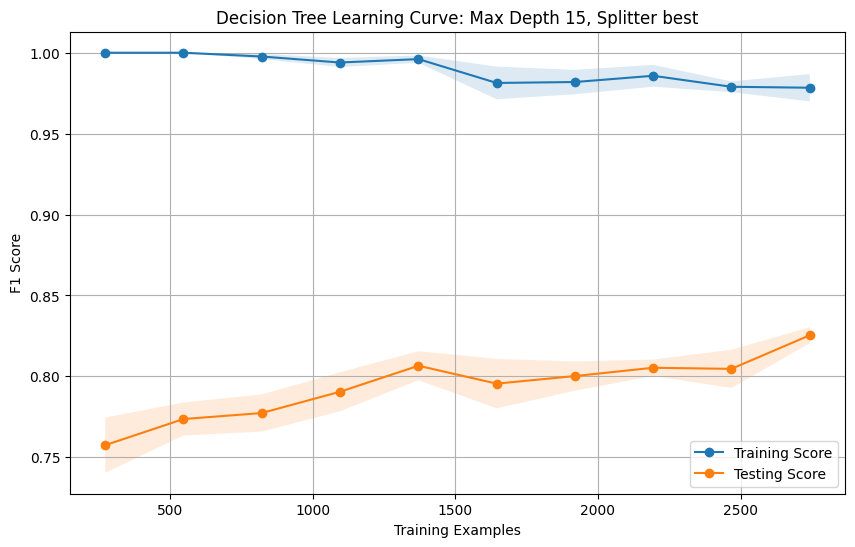

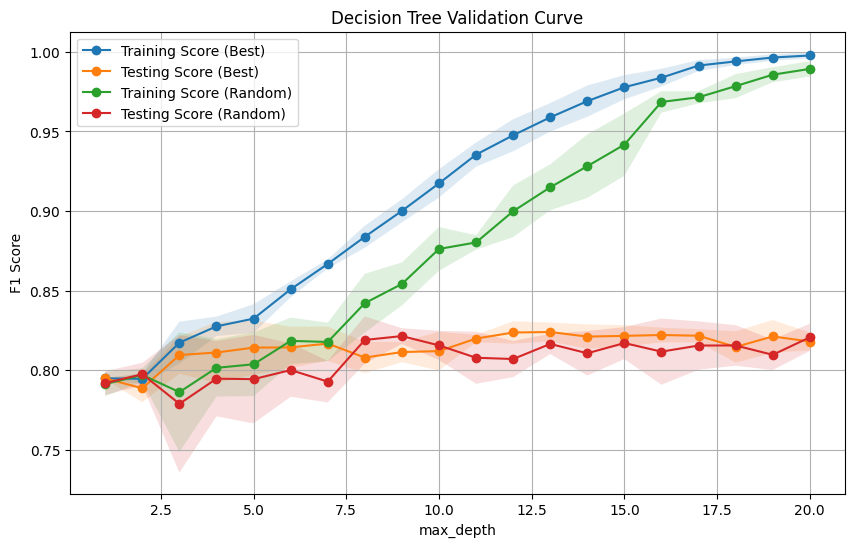

{'max_depth': 16, 'splitter': 'best'}
Best max_depth: 16
Best accuracy with best hyperparameters: 0.9124132298897509
Decision Tree Accuracy: 0.7714285714285715
32.01712656021118


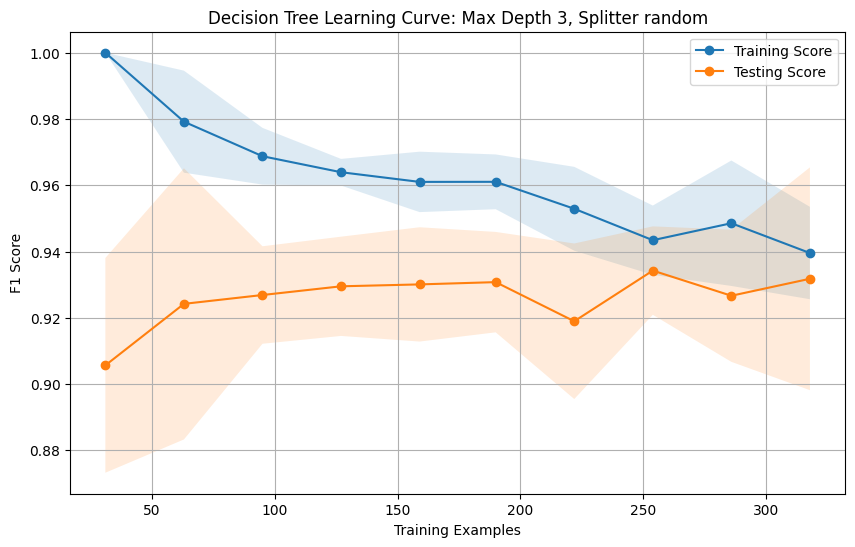

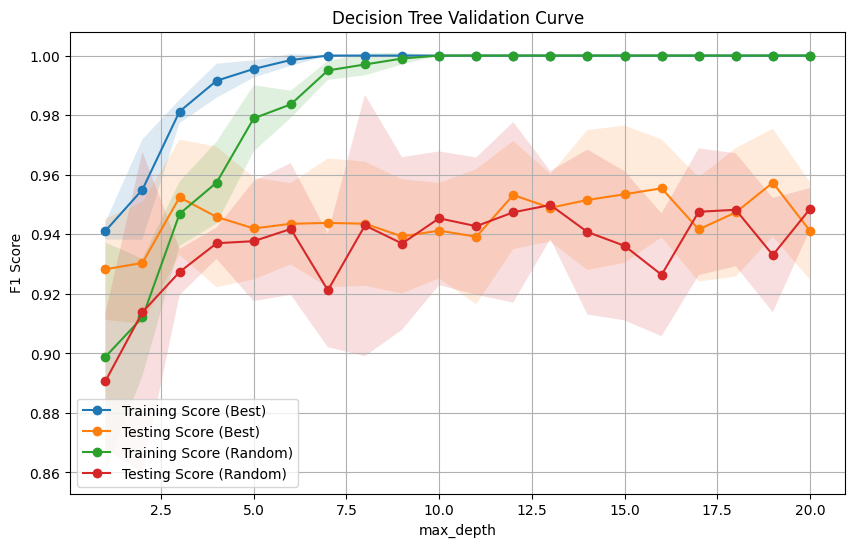

{'max_depth': 4, 'splitter': 'random'}
Best max_depth: 4
Best accuracy with best hyperparameters: 0.984182776801406
Decision Tree Accuracy: 0.9239766081871345
5.827786207199097


In [5]:
scorer = make_scorer(f1_score, pos_label='Good')
decision_tree(X_wine,y_wine,15, 'best',scorer)

scorer = make_scorer(f1_score, pos_label='B')
decision_tree(X_cancer,y_cancer,3, 'random',scorer)

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

def neural_network(X,y,scorer,size, activation):
  start_time = time.time()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


  # Extracting the values of hidden_layer_sizes
  hidden_layer_sizes_values = [(5,), (10,), (15,), (20,), (10, 5), (15, 5), (20, 10)]


  # Creating a Neural Network classifier
  clf_nn = MLPClassifier(activation=activation,hidden_layer_sizes=size, max_iter=200,random_state=42)  # You can adjust parameters


  # Generate learning curves
  train_sizes, train_scores, test_scores = learning_curve(clf_nn, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring=scorer)

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot the learning curve
  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(train_sizes, test_mean, label='Testing Score', marker='o')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

  plt.title(f'Neural Network Learning Curve: Hidden Layer Sizes {size}, Activation {activation}')
  plt.xlabel('Training Examples')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()


  # Initialize MLPClassifier
  mlp = MLPClassifier(hidden_layer_sizes=size, activation=activation, max_iter=200, random_state=42)

  # Initialize arrays to store errors
  train_errors = []
  cv_errors = []

  # Training loop
  for i in range(mlp.max_iter):
      # Use partial_fit for online learning
      mlp.partial_fit(X_train, y_train, classes=np.unique(y))

      # Capture training error
      train_error = 1.0 - mlp.score(X_train, y_train)
      train_errors.append(train_error)

      # Capture cross-validation error
      cv_error = 1.0 - mlp.score(X_test, y_test)
      cv_errors.append(cv_error)

      # Print progress if needed
      #print(f"Iteration {i + 1}/{mlp.max_iter} - Train Error: {train_error:.4f} - CV Error: {cv_error:.4f}")

  # Plot the errors over iterations

  plt.figure(figsize=(10, 6))
  plt.plot(range(1, mlp.max_iter + 1), train_errors, label='Train Error')
  plt.plot(range(1, mlp.max_iter + 1), cv_errors, label='CV Error')
  plt.xlabel('Iteration')
  plt.ylabel('Error Rate')
  plt.title('Training and Cross-Validation Errors over Iterations')
  plt.legend()
  plt.grid(True)
  plt.show()


  param_range = [(5,), (10,), (15,), (20,), (10, 5), (15, 5), (20, 10)]

  # Create a Neural Network classifier
  clf = MLPClassifier(activation='logistic',max_iter=200, random_state=42)

  # Generate validation curve
  train_scores, test_scores = validation_curve(
      clf, X, y, param_name="hidden_layer_sizes", param_range=param_range,
      cv=5, scoring=scorer, n_jobs=-1
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Create a Neural Network classifier
  clf = MLPClassifier(activation='relu',max_iter=200, random_state=42)

  # Generate validation curve
  train_scores, test_scores = validation_curve(
      clf, X, y, param_name="hidden_layer_sizes", param_range=param_range,
      cv=5, scoring=scorer, n_jobs=-1
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean2 = np.mean(train_scores, axis=1)
  train_std2 = np.std(train_scores, axis=1)
  test_mean2 = np.mean(test_scores, axis=1)
  test_std2 = np.std(test_scores, axis=1)

  # Plot the validation curve
  plt.figure(figsize=(10, 6))
  plt.plot(range(len(param_range)), train_mean, label="Training Score (Logistic)", marker='o')
  plt.fill_between(range(len(param_range)), train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(range(len(param_range)), test_mean, label="Testing Score (Logistic)", marker='o')
  plt.fill_between(range(len(param_range)), test_mean - test_std, test_mean + test_std, alpha=0.15)
  plt.plot(range(len(param_range)), train_mean2, label="Training Score (Relu)", marker='o')
  plt.fill_between(range(len(param_range)), train_mean2 - train_std2, train_mean2 + train_std2, alpha=0.15)
  plt.plot(range(len(param_range)), test_mean2, label="Testing Score (Relu)", marker='o')
  plt.fill_between(range(len(param_range)), test_mean2 - test_std2, test_mean2 + test_std2, alpha=0.15)


  # Set x-axis labels
  plt.xticks(range(len(param_range)), [str(val) for val in param_range], rotation=45)

  plt.title('Neural Network Validation Curve')
  plt.xlabel('Hidden Layer Sizes')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()

  param_grid = {
      'hidden_layer_sizes': [(5,), (10,), (15,), (20,), (10, 5), (15, 5), (20, 10)],
      'activation': ['logistic','relu']
  }


  clf = MLPClassifier(max_iter=200, random_state=42)

  # Perform grid search with cross-validation
  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_

  # Train a KNN classifier with the best hyperparameters
  best_clf = MLPClassifier(**best_params,max_iter=200, random_state=42)
  best_clf.fit(X_train, y_train)

  # Make predictions on the validation set
  y_val_pred = best_clf.predict(X)

  # Calculate accuracy on the validation set
  accuracy_val = accuracy_score(y, y_val_pred)

  print(f"Best Hyperparameters: {best_params}")
  print(f"Validation accuracy with best hyperparameters: {accuracy_val}")

  # Training the model
  clf_nn.fit(X_train, y_train)

  # Making predictions
  y_pred_nn = clf_nn.predict(X_test)

  # Evaluating accuracy
  accuracy_nn = accuracy_score(y_test, y_pred_nn)
  print(f'Neural Network Accuracy: {accuracy_nn}')

  total_time = time.time() - start_time
  print(total_time)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

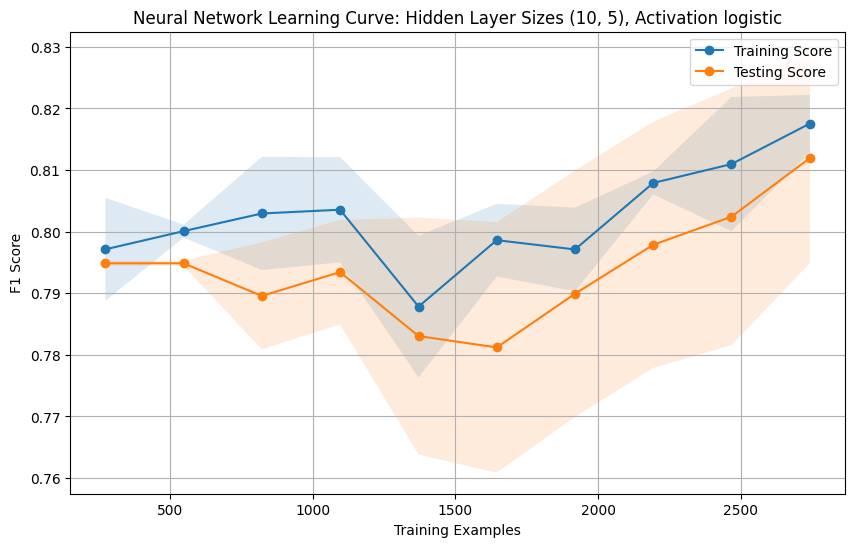

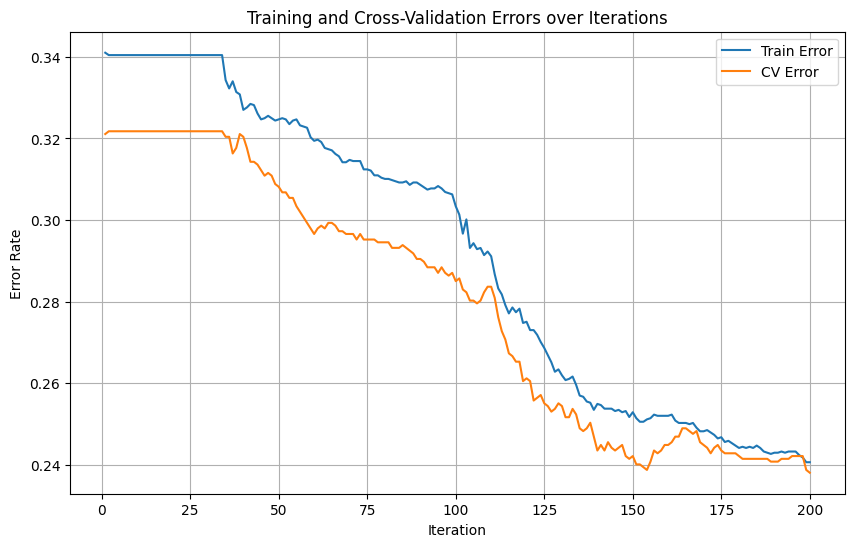

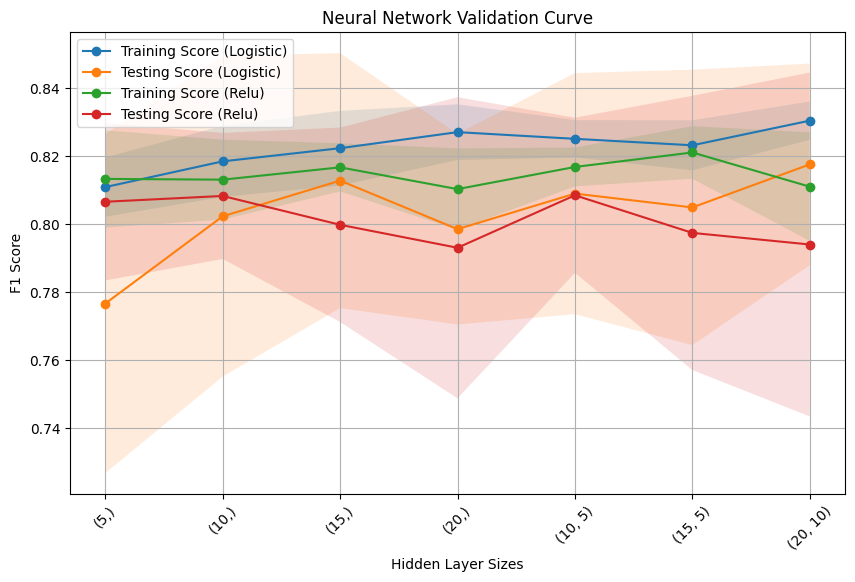

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (10, 5)}
Validation accuracy with best hyperparameters: 0.7554103715802368


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.7598639455782313
252.96538853645325


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

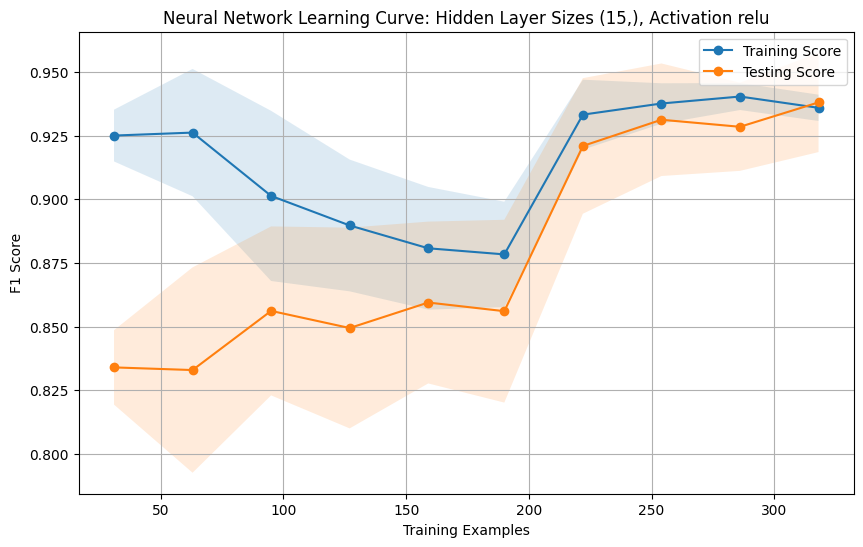

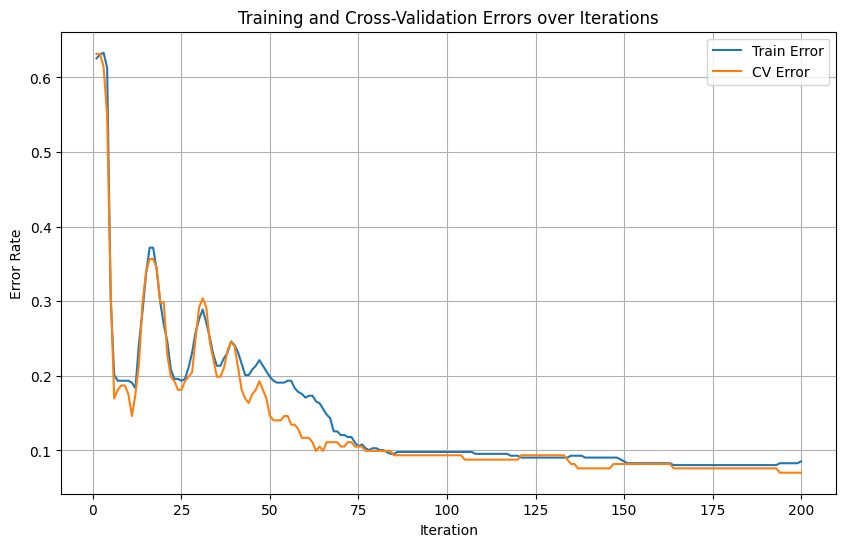

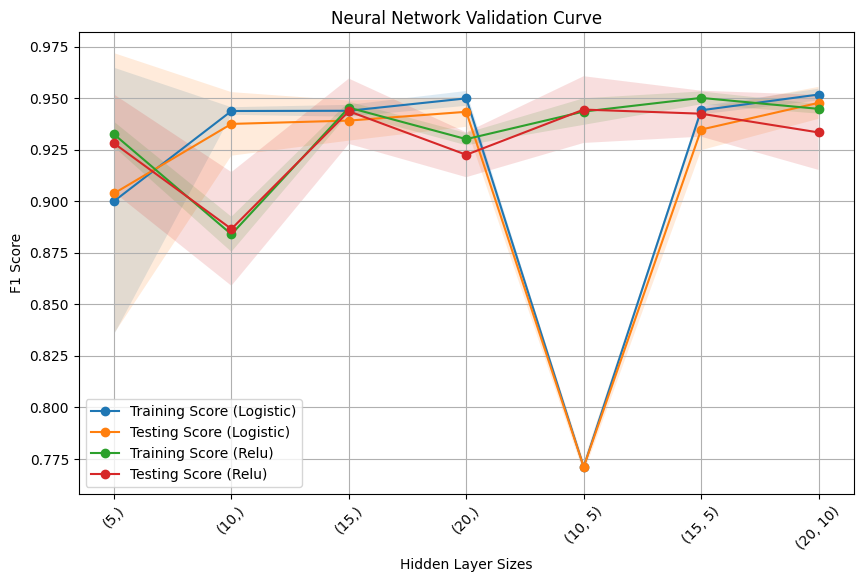

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (15,)}
Validation accuracy with best hyperparameters: 0.9173989455184535
Neural Network Accuracy: 0.9239766081871345
37.081255197525024


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
scorer = make_scorer(f1_score, pos_label='Good')
neural_network(X_wine,y_wine,scorer,(10,5), 'logistic')

scorer = make_scorer(f1_score, pos_label='B')
neural_network(X_cancer,y_cancer,scorer,(15,), 'relu' )


In [8]:
from sklearn.ensemble import AdaBoostClassifier

def adaboost_clasifier(X,y,scorer,n_est,learn_rate):
  start_time = time.time()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Creating a Boosted Decision Trees classifier
  clf_boosted = AdaBoostClassifier(n_estimators=n_est, learning_rate=learn_rate)  # You can adjust parameters

  # Generate learning curves
  train_sizes, train_scores, test_scores = learning_curve(clf_boosted, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),scoring=scorer)

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot the learning curve
  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(train_sizes, test_mean, label='Testing Score', marker='o')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

  plt.title(f'AdaBoost Learning Curve: Num Estimators {n_est}, Learning Rate {learn_rate}')
  plt.xlabel('Training Examples')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()


  # Creating a Decision Tree classifier
  clf = AdaBoostClassifier(learning_rate=learn_rate)

  param_range =  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(10, 6))
  plt.plot(param_range, train_mean, label='Training Score', marker='o')
  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(param_range, test_mean, label='Testing Score', marker='o')
  plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15)
  plt.title(f'Ada Boosting Validation Curve: Learning Rate {learn_rate}')
  plt.xlabel('Num Estimators')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Creating a Decision Tree classifier
  clf = AdaBoostClassifier(n_estimators=n_est)

  param_range =  [0.25,0.5,0.75,1,1.25,1.5]
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name="learning_rate", param_range=param_range, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(10, 6))
  plt.plot(param_range, train_mean, label='Training Score', marker='o')
  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(param_range, test_mean, label='Testing Score', marker='o')
  plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15)
  plt.title(f'Ada Boosting Validation Curve: Num Estimators {n_est}')
  plt.xlabel('Learning Rate')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()



  # Define the hyperparameter grid for KNN with only n_neighbors
  param_grid = {
      'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
      'learning_rate': [0.25,0.5,0.75,1,1.25,1.5]
      }


  # Create a KNN classifier
  clf = AdaBoostClassifier()

  # Perform grid search with cross-validation
  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_

  # Plotting the accuracy for each value of n_neighbors
  results = grid_search.cv_results_
  scores = np.array(results['mean_test_score'])


  # Get the results as a DataFrame
  results_df = pd.DataFrame(grid_search.cv_results_)

  # Pivot the DataFrame for heatmap plotting
  heatmap_data = results_df.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')

  # Plot the heatmap
  plt.figure(figsize=(10, 6))
  sns.heatmap(heatmap_data, annot=True, fmt=".4f", cbar_kws={'label': 'Mean Test Score'})
  plt.title('AdaBoost Hyperparameter Tuning Heatmap')
  plt.xlabel('Learning Rate')
  plt.ylabel('Number of Estimators')
  plt.show()

  # Training the model
  clf_boosted.fit(X_train, y_train)

  # Making predictions
  y_pred_boosted = clf_boosted.predict(X_test)

  # Evaluating accuracy
  accuracy_boosted = accuracy_score(y_test, y_pred_boosted)
  print(f'AdaBoost Accuracy: {accuracy_boosted}')

  total_time = time.time() - start_time
  print(total_time)

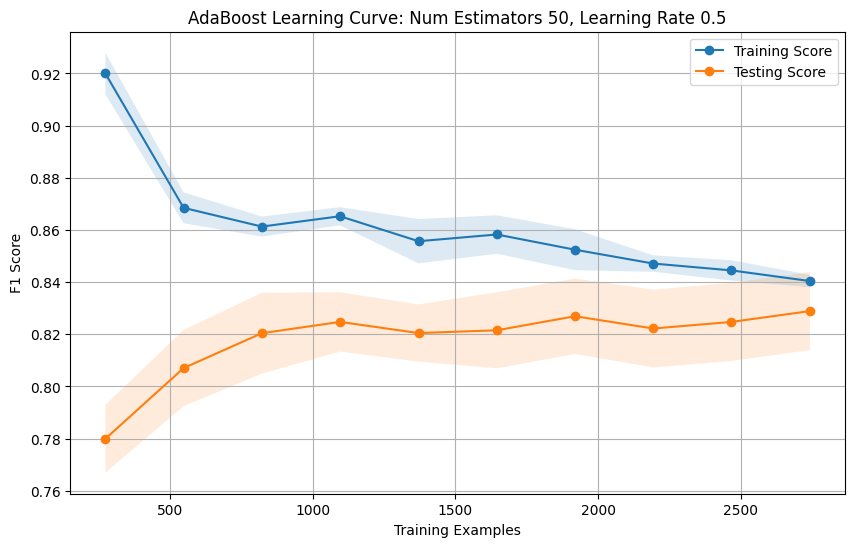

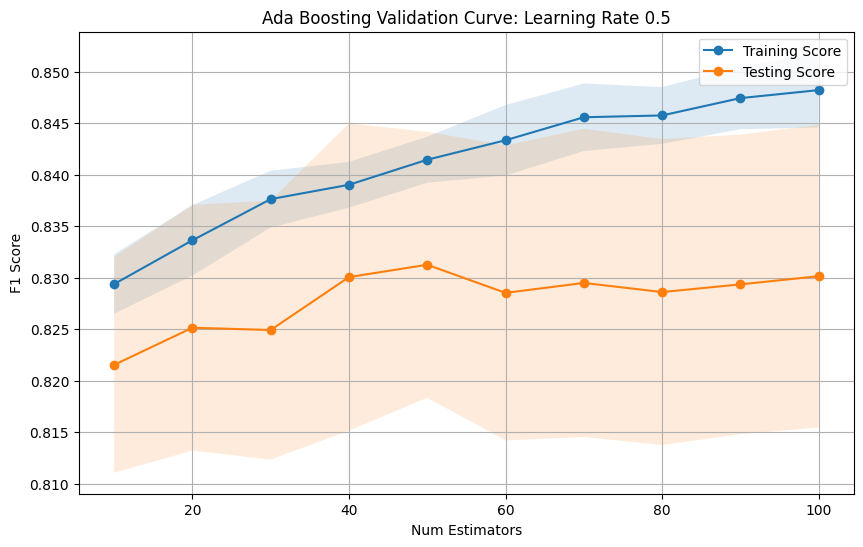

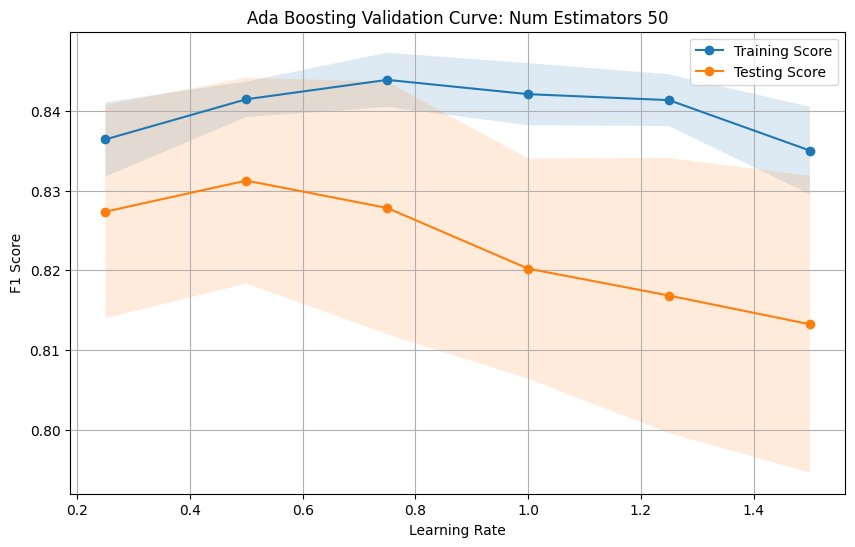

<ipython-input-8-ac1545f1d8ce>:116: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results_df.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')
<ipython-input-8-ac1545f1d8ce>:116: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results_df.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')


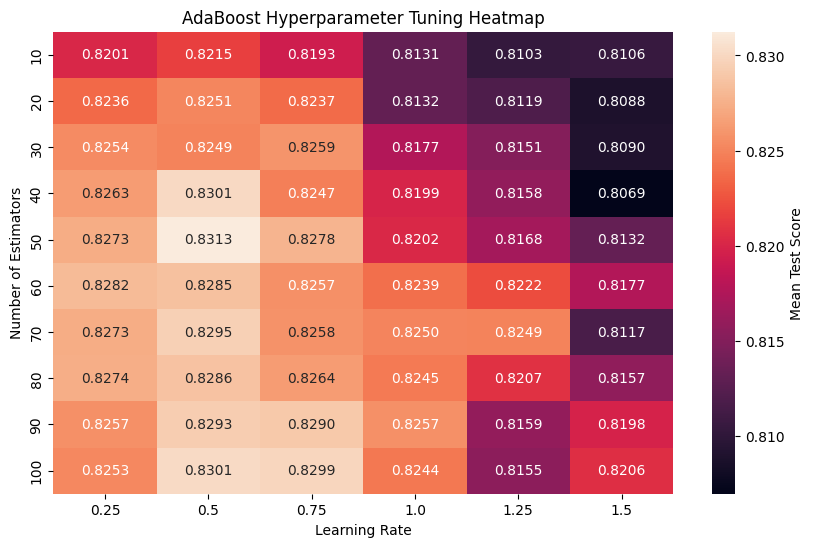

AdaBoost Accuracy: 0.7693877551020408
157.8343904018402


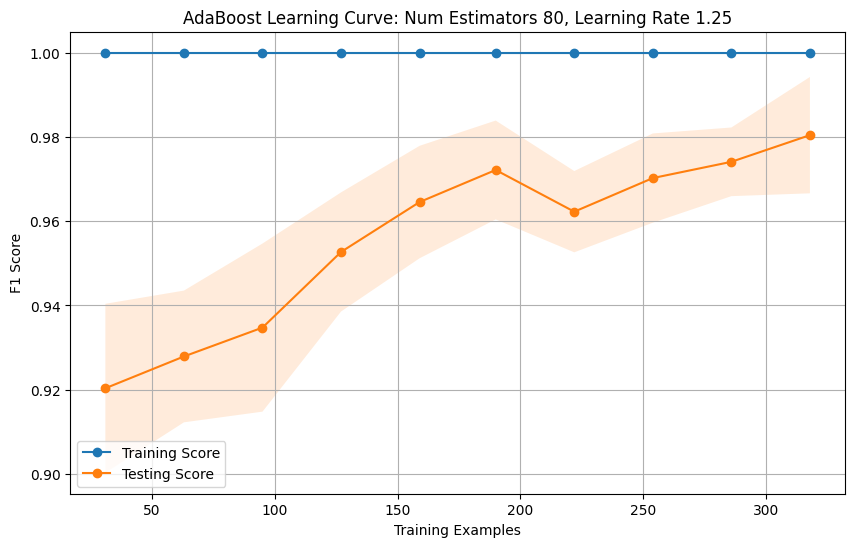

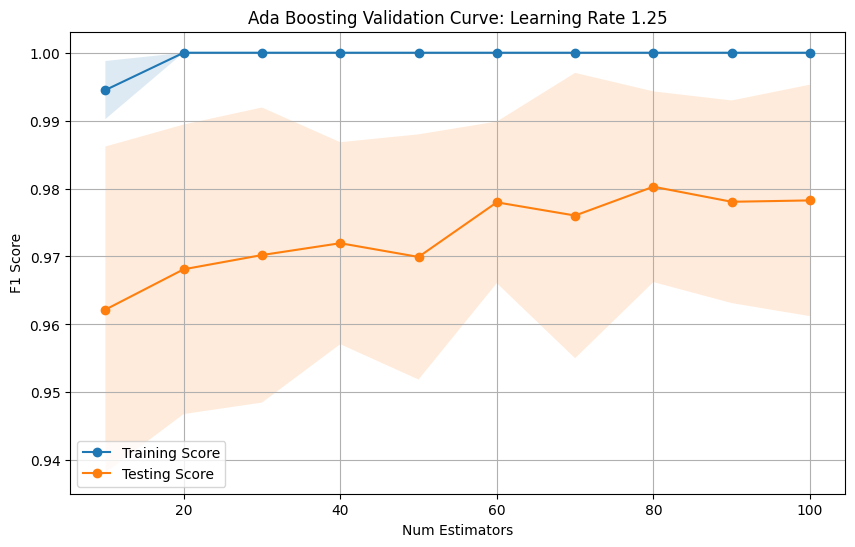

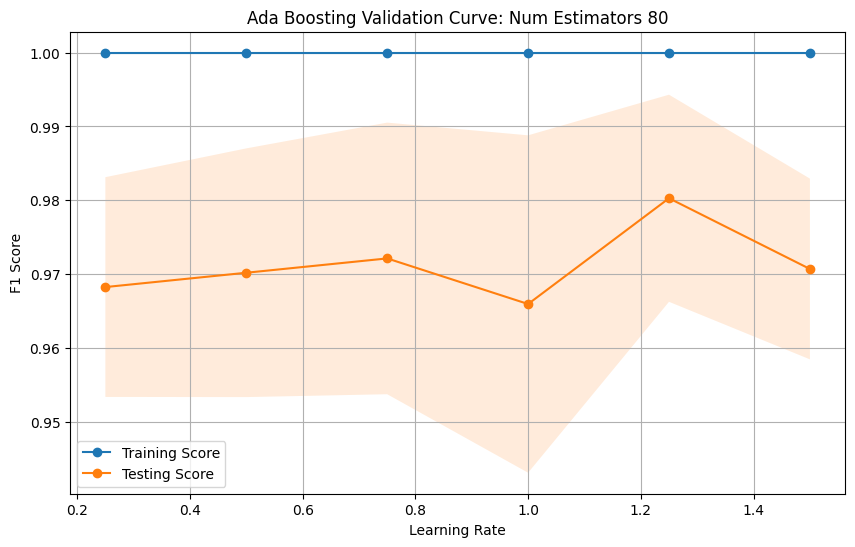

<ipython-input-8-ac1545f1d8ce>:116: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results_df.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')
<ipython-input-8-ac1545f1d8ce>:116: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results_df.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')


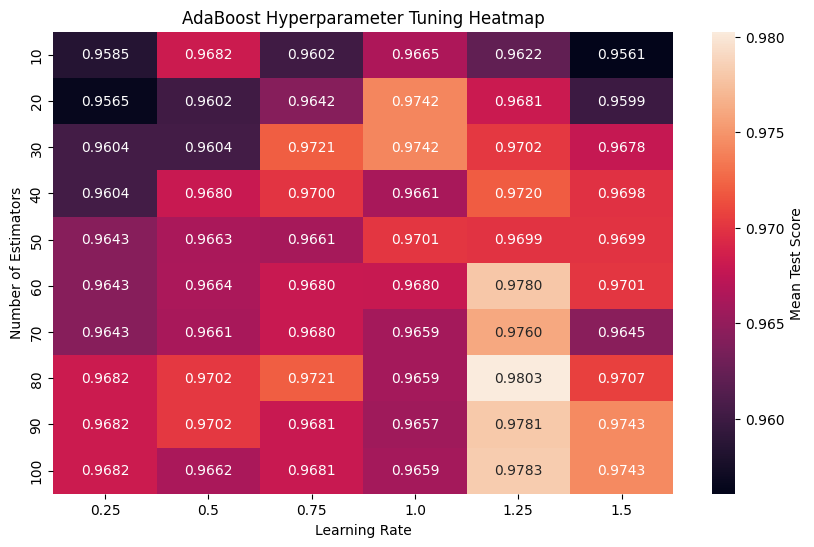

AdaBoost Accuracy: 0.9649122807017544
87.49859976768494


In [9]:
scorer = make_scorer(f1_score, pos_label='Good')
adaboost_clasifier(X_wine,y_wine,scorer,50,0.5)

scorer = make_scorer(f1_score, pos_label='B')
adaboost_clasifier(X_cancer,y_cancer,scorer,80,1.25)

In [10]:
from sklearn.svm import SVC

def svc(X,y,scorer,c):
  start_time = time.time()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  # Define the hyperparameter grid for KNN with only n_neighbors

  # Creating a Support Vector Machine classifier
  clf_svm = SVC(kernel='rbf',C=c)  # You can try different kernel functions (e.g., 'linear', 'poly', 'sigmoid', 'precomputed')

  # Generate learning curves
  train_sizes, train_scores, test_scores = learning_curve(clf_svm, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),scoring=scorer)

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot the learning curve
  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(train_sizes, test_mean, label='Testing Score', marker='o')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

  plt.title(f'SVM Learning Curve: Kernel RBF, C (Cost) {c}')
  plt.xlabel('Training Examples')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Creating a Decision Tree classifier
  clf = SVC(kernel='rbf')
  param_range = np.arange(1, 11)
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name='C', param_range=param_range, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Creating a Decision Tree classifier
  clf = SVC(kernel='poly')
  param_range = np.arange(1, 11)
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name="C", param_range=param_range, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean2 = np.mean(train_scores, axis=1)
  train_std2 = np.std(train_scores, axis=1)
  test_mean2 = np.mean(test_scores, axis=1)
  test_std2 = np.std(test_scores, axis=1)

  # Creating a Decision Tree classifier
  clf = SVC(kernel='linear')
  param_range = np.arange(1, 11)
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name="C", param_range=param_range, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean3 = np.mean(train_scores, axis=1)
  train_std3 = np.std(train_scores, axis=1)
  test_mean3 = np.mean(test_scores, axis=1)
  test_std3 = np.std(test_scores, axis=1)

  plt.figure(figsize=(10, 6))
  plt.plot(param_range, train_mean, label='Training Score (RBF)', marker='o')
  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(param_range, test_mean, label='Testing Score (RBF)', marker='o')
  plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15)

  plt.plot(param_range, train_mean2, label='Training Score (Poly)', marker='o')
  plt.fill_between(param_range, train_mean2 - train_std2, train_mean2 + train_std2, alpha=0.15)
  plt.plot(param_range, test_mean2, label='Testing Score (Poly)', marker='o')
  plt.fill_between(param_range, test_mean2 - test_std2, test_mean2 + test_std2, alpha=0.15)

  plt.plot(param_range, train_mean3, label='Training Score (Linear)', marker='o')
  plt.fill_between(param_range, train_mean3 - train_std3, train_mean3 + train_std3, alpha=0.15)
  plt.plot(param_range, test_mean3, label='Testing Score (Linear)', marker='o')
  plt.fill_between(param_range, test_mean3 - test_std3, test_mean3 + test_std3, alpha=0.15)

  plt.title('SVM Validation Curve')
  plt.xlabel('C (Cost)')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()

  param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': np.arange(1, 11),
  }

  # Create an SVC classifier
  clf = SVC()

  # Perform grid search with cross-validation
  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_

  # Train an SVC classifier with the best hyperparameters
  best_clf = SVC(**best_params)
  best_clf.fit(X_train, y_train)

  # Make predictions on the validation set
  y_val_pred = best_clf.predict(X)

  # Calculate accuracy on the validation set
  accuracy_val = accuracy_score(y, y_val_pred)

  print(f"Best Hyperparameters: {best_params}")
  print(f"Validation accuracy with best hyperparameters: {accuracy_val}")

  # Training the model
  clf_svm.fit(X_train, y_train)

  # Making predictions
  y_pred_svm = clf_svm.predict(X_test)

  # Evaluating accuracy
  accuracy_svm = accuracy_score(y_test, y_pred_svm)
  print(f'SVM Accuracy: {accuracy_svm}')


  total_time = time.time() - start_time
  print(total_time)




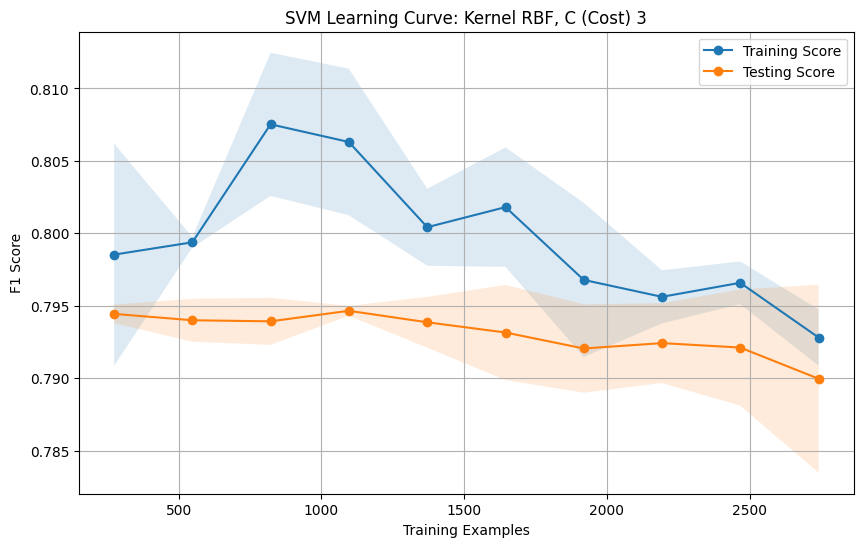

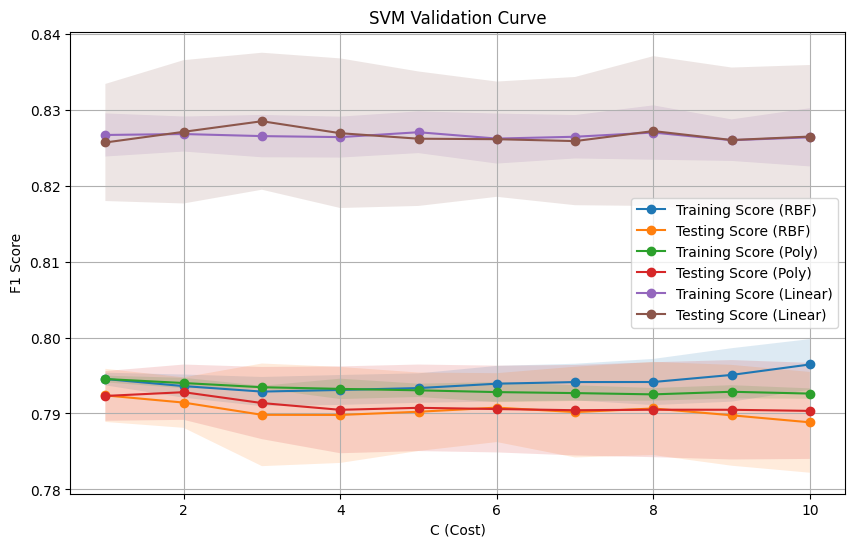

Best Hyperparameters: {'C': 3, 'kernel': 'linear'}
Validation accuracy with best hyperparameters: 0.754389546753777
SVM Accuracy: 0.6789115646258503
2361.959908246994


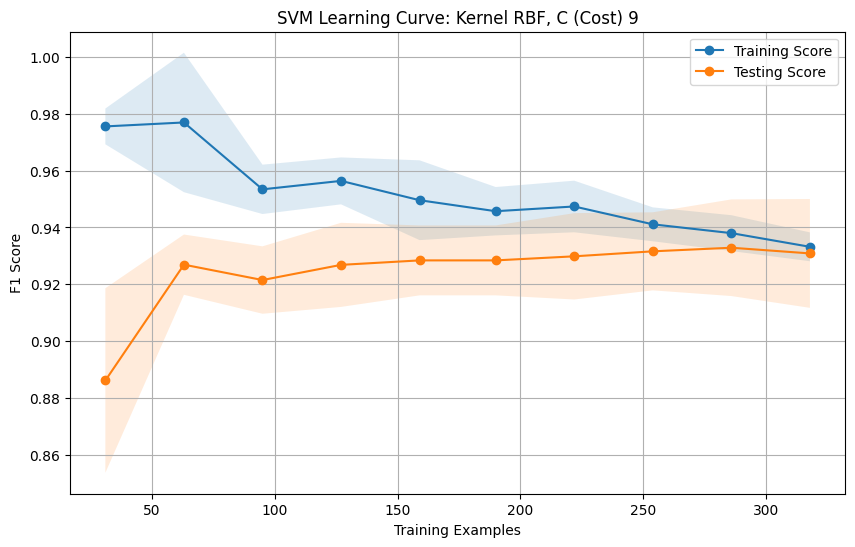

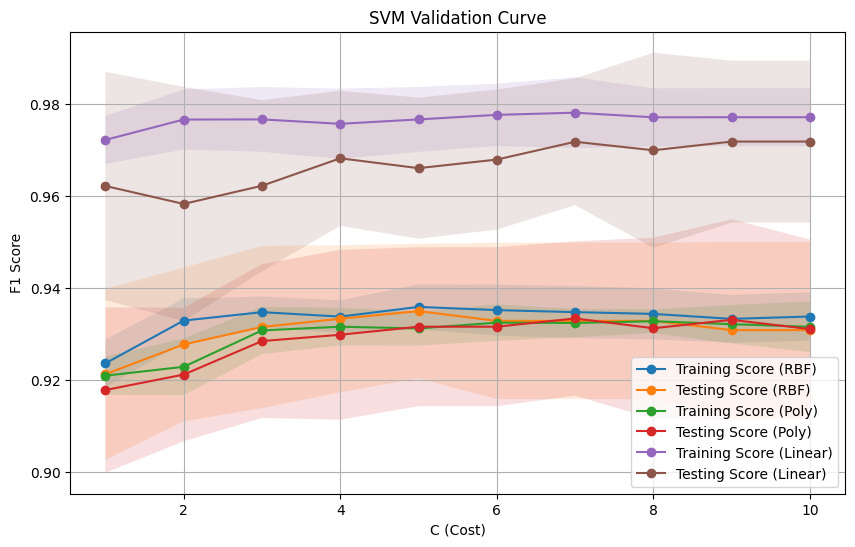

Best Hyperparameters: {'C': 9, 'kernel': 'linear'}
Validation accuracy with best hyperparameters: 0.968365553602812
SVM Accuracy: 0.9415204678362573
262.7015633583069


In [11]:
scorer = make_scorer(f1_score, pos_label='Good')
svc(X_wine,y_wine,scorer,3)

scorer = make_scorer(f1_score, pos_label='B')
svc(X_cancer,y_cancer,scorer,9)

In [12]:
from sklearn.neighbors import KNeighborsClassifier


def k_neighbors(X,y,scorer,neighbours):
  start_time = time.time()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


  # Creating a k-Nearest Neighbors classifier
  clf_knn = KNeighborsClassifier(n_neighbors=neighbours)  # You can adjust the number of neighbors

  # Generate learning curves
  train_sizes, train_scores, test_scores = learning_curve(clf_knn, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),scoring=scorer)

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot the learning curve
  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(train_sizes, test_mean, label='Testing Score', marker='o')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

  plt.title(f'K-neighbors Learning Curve: Weights Uniform, Num Nieghbours {neighbours}')
  plt.xlabel('Training Examples')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()


    # Define the hyperparameter grid for KNN with both n_neighbors and weights
  param_range_neighbors = np.arange(1, 21)
  param_range_weights = ['uniform', 'distance']

  # Creating a Decision Tree classifier
  clf = KNeighborsClassifier(weights='distance')
  param_range = np.arange(1, 21)
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name="n_neighbors", param_range=param_range_neighbors, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Creating a Decision Tree classifier
  clf = KNeighborsClassifier(weights='uniform')  # You can adjust parameters as needed

  param_range = np.arange(1, 21)
  # Generate a validation curve
  train_scores, test_scores = validation_curve(
      clf, X_train, y_train, param_name="n_neighbors", param_range=param_range_neighbors, cv=5, scoring=scorer
  )

  # Calculate mean and standard deviation of training and testing scores
  train_mean2 = np.mean(train_scores, axis=1)
  train_std2 = np.std(train_scores, axis=1)
  test_mean2 = np.mean(test_scores, axis=1)
  test_std2 = np.std(test_scores, axis=1)

  plt.figure(figsize=(10, 6))
  plt.plot(param_range, train_mean, label='Training Score (Distance)', marker='o')
  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
  plt.plot(param_range, test_mean, label='Testing Score (Distance)', marker='o')
  plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15)
  plt.plot(param_range, train_mean2, label='Training Score (Uniform)', marker='o')
  plt.fill_between(param_range, train_mean2 - train_std2, train_mean2 + train_std2, alpha=0.15)
  plt.plot(param_range, test_mean2, label='Testing Score (Uniform)', marker='o')
  plt.fill_between(param_range, test_mean2 - test_std2, test_mean2 + test_std2, alpha=0.15)
  plt.title('K-neighbors Validation Curve')
  plt.xlabel('Num Neighbours')
  plt.ylabel('F1 Score')
  plt.legend()
  plt.grid(True)
  plt.show()


  # Define the hyperparameter grid for KNN with only n_neighbors
  param_grid = {
      'n_neighbors': np.arange(1, 21),
      'weights': ['uniform', 'distance']
  }

  # Create a KNN classifier
  clf = KNeighborsClassifier()

  # Perform grid search with cross-validation
  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_

  # Train a KNN classifier with the best hyperparameters
  best_clf = KNeighborsClassifier(**best_params)
  best_clf.fit(X_train, y_train)

  # Make predictions on the validation set
  y_val_pred = best_clf.predict(X)

  # Calculate accuracy on the validation set
  accuracy_val = accuracy_score(y, y_val_pred)

  print(f"Best Hyperparameters: {best_params}")
  print(f"Validation accuracy with best hyperparameters: {accuracy_val}")

  # Training the model
  clf_knn.fit(X_train, y_train)

  # Making predictions
  y_pred_knn = clf_knn.predict(X_test)

  # Evaluating accuracy
  accuracy_knn = accuracy_score(y_test, y_pred_knn)
  print(f'k-Nearest Neighbors Accuracy: {accuracy_knn}')

  total_time = time.time() - start_time
  print(total_time)


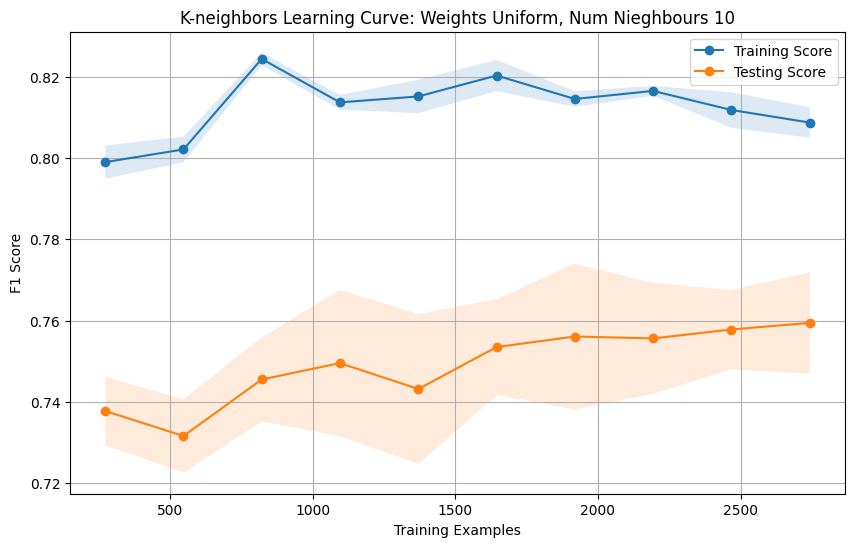

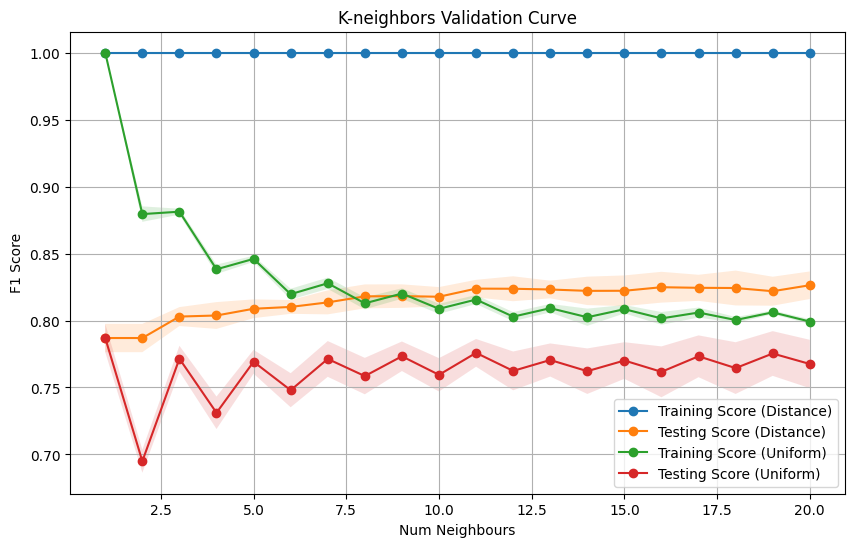

Best Hyperparameters: {'n_neighbors': 20, 'weights': 'distance'}
Validation accuracy with best hyperparameters: 0.9348713760718661
k-Nearest Neighbors Accuracy: 0.6925170068027211
45.445170164108276


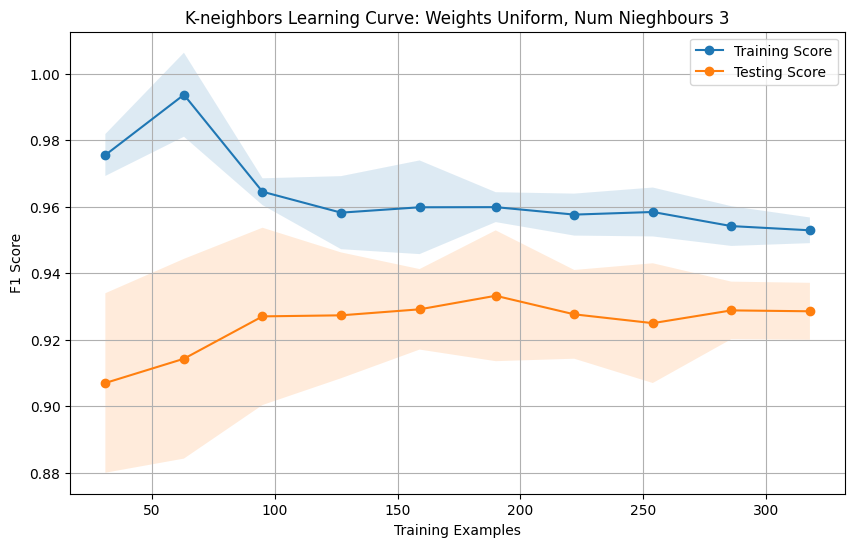

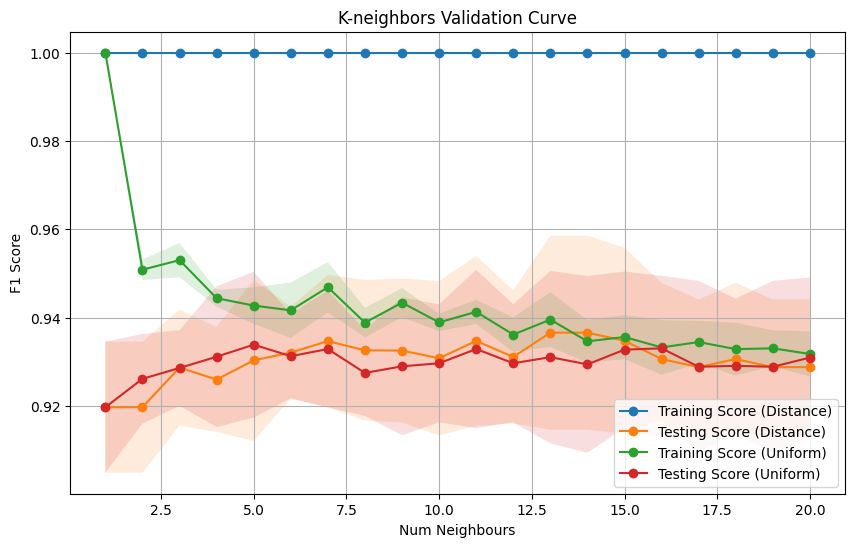

Best Hyperparameters: {'n_neighbors': 13, 'weights': 'distance'}
Validation accuracy with best hyperparameters: 0.9929701230228472
k-Nearest Neighbors Accuracy: 0.9415204678362573
11.600766897201538


In [13]:
scorer = make_scorer(f1_score, pos_label='Good')
k_neighbors(X_wine,y_wine,scorer,10)

scorer = make_scorer(f1_score, pos_label='B')
k_neighbors(X_cancer,y_cancer,scorer,3)